In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.shape

(807, 14)

In [26]:
pokemon.head(2)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80


In [31]:
# Data Wrangling
pkmn_types = pokemon.melt(id_vars = ['id','species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level',
                          value_name = 'type').dropna()

In [32]:
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [35]:
# Decreasing index order based on frequency of pokemon types
type_order = pkmn_types['type'].value_counts().index

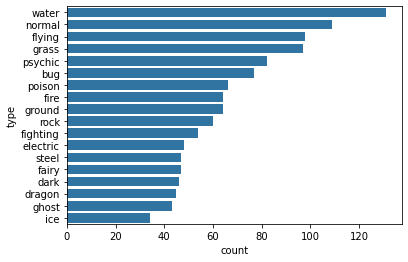

In [37]:
# Absolute Frequency Plot
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [45]:
# Find the length of the longest bar in terms of proportion
n_pokemon = pokemon.shape[0]
max_type_count = type_counts.max()
max_proportion = max_type_count / n_pokemon
max_proportion

0.1623296158612144

In [47]:
# Create evenly spaced (0.02) values from 0 to max_prop
tick_props = np.arange(0, max_proportion, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

In [48]:
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

In [49]:
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

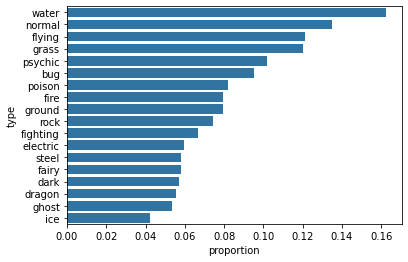

In [50]:
# Plot the data again with different ticks

# Relative Frequency Plot
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

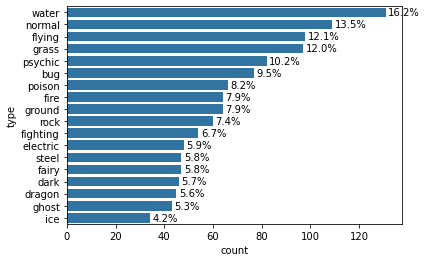

In [54]:
# Plot with percentage

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count / n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')